Import necessary libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Load the dataset from Excel file
file_path = "Tbdiseasesymptoms.csv"  # Update with your file path
data = pd.read_csv(file_path)

In [17]:
# print first 5 rows of the dataset
data.head()

,no,id,name,gender,date,time,fever for two weeks,coughing blood,sputum mixed with blood,night sweats,chest pain,back pain in certain parts,shortness of breath,weight loss,body feels tired,lumps that appear around the armpits and neck,cough and phlegm continuously for two weeks to four weeks,swollen lymph nodes,loss of appetite
0,1,8048761033,Noe,Male,12/10/2020,4:51 PM,0,1,1,1,1,1,1,1,0,0,1,0,1
1,2,793846900,Genna,Male,11/16/2020,9:35 AM,1,1,1,0,0,1,1,0,0,0,1,1,1
2,3,5619727459,Leesa,Male,1/18/2020,8:38 PM,0,0,1,1,0,1,0,0,0,1,1,1,1
3,4,4337104062,Case,Female,2/4/2020,3:09 PM,0,1,0,1,1,0,0,1,1,0,1,0,1
4,5,9507094539,Leola,Female,7/9/2020,5:51 PM,0,1,0,1,1,1,0,1,1,1,1,0,0


In [18]:
# print last 5 rows of the dataset
data.tail()

,no,id,name,gender,date,time,fever for two weeks,coughing blood,sputum mixed with blood,night sweats,chest pain,back pain in certain parts,shortness of breath,weight loss,body feels tired,lumps that appear around the armpits and neck,cough and phlegm continuously for two weeks to four weeks,swollen lymph nodes,loss of appetite
995,996,8502616307,Dimitri,Female,5/24/2020,12:39 PM,1,0,1,0,0,1,0,0,0,0,1,1,0
996,997,3468480814,Averill,Male,1/12/2020,6:47 PM,1,1,1,1,1,0,1,0,0,1,0,0,1
997,998,1317594584,Hi,Female,12/2/2020,7:59 PM,1,1,1,0,0,0,0,1,0,0,0,0,0
998,999,4933185840,Vivienne,Female,11/11/2020,1:25 PM,0,1,0,1,1,1,1,0,0,0,1,1,1
999,1000,7056586694,Blondell,Female,3/24/2020,8:06 PM,0,0,1,0,0,0,0,0,0,1,0,1,1


In [19]:
# number of rows and columns in the dataset
data.shape

(1000, 19)

In [20]:
# getting some info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   no                                                         1000 non-null   int64 
 1   id                                                         1000 non-null   int64 
 2   name                                                       1000 non-null   object
 3   gender                                                     1000 non-null   object
 4   date                                                       1000 non-null   object
 5   time                                                       1000 non-null   object
 6   fever for two weeks                                        1000 non-null   int64 
 7   coughing blood                                             1000 non-null   int64 
 8   sputum mixed with b


Data Collection and Processing

In [21]:
# 1. Convert 'date' and 'time' columns to datetime format
data['date'] = pd.to_datetime(data['date'])
data['time'] = pd.to_datetime(data['time'], format='%I:%M %p').dt.time

# 2. Check for missing values and handle them
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# Since there are no missing values, no further action is needed for handling missing values.

# 3. Convert categorical variables into numerical representations (One-hot encoding for 'gender')
data = pd.get_dummies(data, columns=['gender'], drop_first=True)

# 4. Normalize or scale numerical features if needed (Not required in this case since the features are binary)

# Display the preprocessed data
print("Preprocessed data:\n", data.head())


Missing values:
 no                                                           0
id                                                           0
name                                                         0
gender                                                       0
date                                                         0
time                                                         0
fever for two weeks                                          0
coughing blood                                               0
sputum mixed with blood                                      0
night sweats                                                 0
chest pain                                                   0
back pain in certain parts                                   0
shortness of breath                                          0
weight loss                                                  0
body feels tired                                             0
lumps that appear around the armpits a

Tuberculosis Present or Not

In [22]:

# Load the dataset
data = pd.read_csv('Tbdiseasesymptoms.csv')

# Define relevant symptoms for tuberculosis
tuberculosis_symptoms = ['fever for two weeks', 'coughing blood', 'night sweats', 'weight loss', 'chest pain',
                          'sputum mixed with blood', 'shortness of breath', 'body feels tired', 'lumps that appear around the armpits and neck',
                           'cough and phlegm continuously for two weeks to four weeks',
                          'swollen lymph nodes', 'loss of appetite', 'back pain in certain parts']

# Function to determine tuberculosis presence based on symptoms
def is_tuberculosis_present(row):
    tuberculosis_conditions = [
        (row['fever for two weeks'] == 1 and row['coughing blood'] == 1),
        (row['coughing blood'] == 1 and row['sputum mixed with blood'] == 1),
        (row['night sweats'] == 1 and row['chest pain'] == 1),
        (row['coughing blood'] == 1 and row['night sweats'] == 1),
        (row['weight loss'] == 1 and row['coughing blood'] == 1),
        (row['shortness of breath'] == 1 and row['coughing blood'] == 1),
        (row['chest pain'] == 1 and row['back pain in certain parts'] == 1),
        (row['night sweats'] == 1 and row['weight loss'] == 1),
        (row['lumps that appear around the armpits and neck'] == 1 and row['swollen lymph nodes'] == 1),
        (row['cough and phlegm continuously for two weeks to four weeks'] == 1 and row['swollen lymph nodes'] == 1),
        (row['cough and phlegm continuously for two weeks to four weeks'] == 1 and row['loss of appetite'] == 1)
    ]
    for condition in tuberculosis_conditions:
        if condition:
            return 1  # Tuberculosis present
    return 0  # Tuberculosis not present

# Create a new column indicating tuberculosis presence
data['Tuberculosis_present'] = data.apply(is_tuberculosis_present, axis=1)

# Save the modified dataset
data.to_csv('Tbdiseasesymptoms_with_tuberculosis.csv', index=False)



In [23]:
# print first 5 rows of the dataset
data.head()

,no,id,name,gender,date,time,fever for two weeks,coughing blood,sputum mixed with blood,night sweats,chest pain,back pain in certain parts,shortness of breath,weight loss,body feels tired,lumps that appear around the armpits and neck,cough and phlegm continuously for two weeks to four weeks,swollen lymph nodes,loss of appetite,Tuberculosis_present
0,1,8048761033,Noe,Male,12/10/2020,4:51 PM,0,1,1,1,1,1,1,1,0,0,1,0,1,1
1,2,793846900,Genna,Male,11/16/2020,9:35 AM,1,1,1,0,0,1,1,0,0,0,1,1,1,1
2,3,5619727459,Leesa,Male,1/18/2020,8:38 PM,0,0,1,1,0,1,0,0,0,1,1,1,1,1
3,4,4337104062,Case,Female,2/4/2020,3:09 PM,0,1,0,1,1,0,0,1,1,0,1,0,1,1
4,5,9507094539,Leola,Female,7/9/2020,5:51 PM,0,1,0,1,1,1,0,1,1,1,1,0,0,1


logistic regression classifier

Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.70      0.75        30
           1       0.95      0.97      0.96       170

    accuracy                           0.93       200
   macro avg       0.88      0.84      0.85       200
weighted avg       0.93      0.93      0.93       200

Confusion Matrix:
 [[ 21   9]
 [  5 165]]
ROC-AUC Score: 0.9692156862745098
Cross-validation scores on 5 folds: [0.915 0.935 0.94  0.94  0.94 ]
Mean cross-validation score: 0.9339999999999999
Accuracy on training set: 0.94625
Classification Report on training set:
               precision    recall  f1-score   support

           0       0.87      0.66      0.75        98
           1       0.95      0.99      0.97       702

    accuracy                           0.95       800
   macro avg       0.91      0.82      0.86       800
weighted avg       0.94      0.95      0.94       800



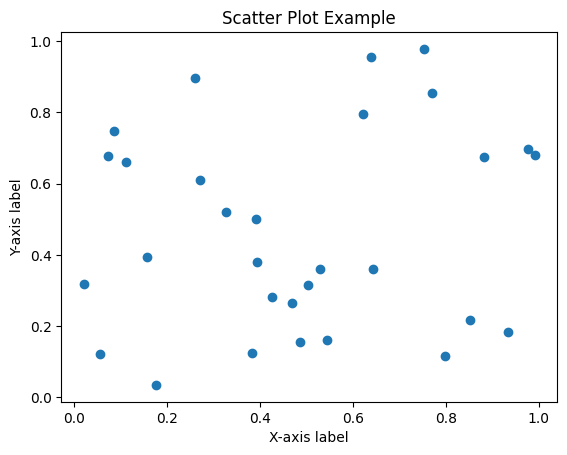

In [36]:
# Load the dataset
data = pd.read_csv('Tbdiseasesymptoms_with_tuberculosis.csv')

# Define relevant symptoms for tuberculosis
tuberculosis_symptoms = [
    'fever for two weeks',
    'coughing blood',
    'sputum mixed with blood',
    'night sweats',
    'chest pain',
    'back pain in certain parts',
    'shortness of breath',
    'weight loss',
    'body feels tired',
    'lumps that appear around the armpits and neck',
    'cough and phlegm continuously for two weeks to four weeks',
    'swollen lymph nodes',
    'loss of appetite'
]

# Define features and target variable
X = data[tuberculosis_symptoms]  # Features
y = data['Tuberculosis_present']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
log_reg_model = LogisticRegression()

# Train the logistic regression model
log_reg_model.fit(X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(X_test)
y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1]  # Predict probabilities for positive class
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_mat)
print("ROC-AUC Score:", roc_auc)

# Cross-validation to check for overfitting
cross_val_score_log_reg = cross_val_score(log_reg_model, X, y, cv=5)
print("Cross-validation scores on 5 folds:", cross_val_score_log_reg)
print("Mean cross-validation score:", cross_val_score_log_reg.mean())


# Evaluate the model on the training set
y_train_pred = log_reg_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_report = classification_report(y_train, y_train_pred)
print("Accuracy on training set:", train_accuracy)
print("Classification Report on training set:\n", train_report)

import matplotlib.pyplot as plt
import numpy as np

# Generate some data
x = np.random.rand(30)
y = np.random.rand(30)

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot the data as a scatter plot
ax.scatter(x, y)

# Set labels for the x and y axes
ax.set_xlabel('X-axis label')
ax.set_ylabel('Y-axis label')

# Set a title for the plot
ax.set_title('Scatter Plot Example')

# Display the plot
plt.show()


Support Vector Machine (SVM) model

In [35]:
# Initialize SVM model
svm_model = SVC(kernel='linear')

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", confusion_mat)


Accuracy: 0.925
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.70      0.74        30
           1       0.95      0.96      0.96       170

    accuracy                           0.93       200
   macro avg       0.86      0.83      0.85       200
weighted avg       0.92      0.93      0.92       200

Confusion Matrix:
 [[ 21   9]
 [  6 164]]


Overfitting and underfitting

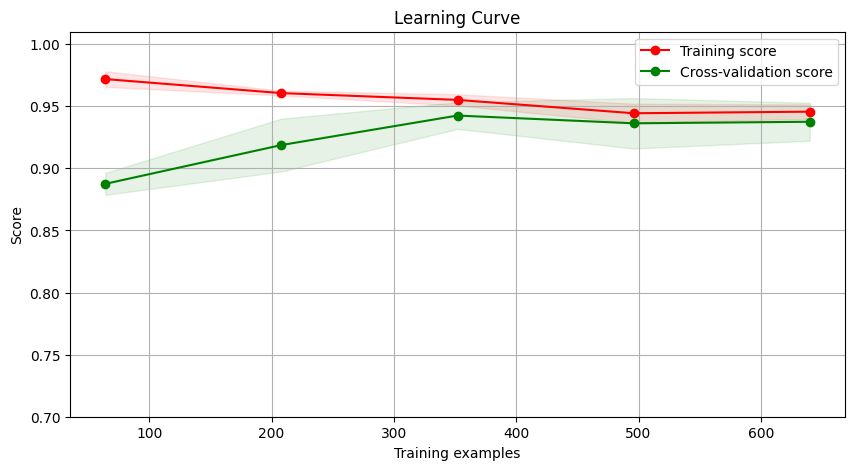

In [37]:
# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(10, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

    return plt

# Plot learning curve
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
plot_learning_curve(svm_model, "Learning Curve", X_train, y_train, axes=axes, ylim=(0.7, 1.01), cv=5, n_jobs=-1)

plt.show()

False Positive Rate

In [26]:
# Identify false positive situations
false_positives = []
for i, pred in enumerate(y_pred):
    if pred == 1 and y_test.iloc[i] == 0:
        false_positives.append(X_test.iloc[i])

print("\nFalse Positive Situations:")
for fp in false_positives:
    print(fp)


False Positive Situations:
fever for two weeks                                          0
coughing blood                                               0
sputum mixed with blood                                      1
night sweats                                                 1
chest pain                                                   0
back pain in certain parts                                   1
shortness of breath                                          0
weight loss                                                  0
body feels tired                                             1
lumps that appear around the armpits and neck                1
cough and phlegm continuously for two weeks to four weeks    0
swollen lymph nodes                                          0
loss of appetite                                             1
Name: 601, dtype: int64
fever for two weeks                                          1
coughing blood                                               0
spu

Build the predictive model

In [27]:
# Identify false positive situations
false_positives = []
for i, pred in enumerate(y_pred):
    if pred == 1 and y_test.iloc[i] == 0:
        false_positives.append(X_test.iloc[i])

# Convert false positives to tuples for comparison
false_positives_tuples = [tuple(fp) for fp in false_positives]

# User input
user_input = (1,0,0,0,1,0,0,1,1,0,0,0,1)  # Example user input

# Check if user input matches any false positive situations
user_input_tuple = tuple(user_input)
if user_input_tuple in false_positives_tuples:
    print("The input matches a false positive situation.")
    print("Please consult a doctor for further evaluation.")
else:
    # Convert user input to numpy array
    user_input_array = np.array(user_input).reshape(1, -1)

    # Make prediction
    prediction = svm_model.predict(user_input_array)

    # Output prediction
    if prediction[0] == 1:
        print('The model predicts that you have Tuberculosis.')
        print('Please consult a doctor for further evaluation.')
    else:
        print('The model predicts that you do not have Tuberculosis.')


The input matches a false positive situation.
Please consult a doctor for further evaluation.
